In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [4]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Create the ANN model
model = keras.Sequential([
    layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(15, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.4)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6768 - loss: 0.6398 - val_accuracy: 0.7956 - val_loss: 0.4856
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8570 - loss: 0.4180 - val_accuracy: 0.8759 - val_loss: 0.3510
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9338 - loss: 0.2746 - val_accuracy: 0.9197 - val_loss: 0.2727
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9684 - loss: 0.1922 - val_accuracy: 0.9416 - val_loss: 0.2257
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9591 - loss: 0.1918 - val_accuracy: 0.9416 - val_loss: 0.1966
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9559 - loss: 0.1485 - val_accuracy: 0.9416 - val_loss: 0.1806
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9778 - loss: 0.1169 - val_accuracy: 0.9416 - val_loss: 0.1694
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9853 - loss: 0.0919 - val_accuracy: 0.9416 -

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.9489 - val_loss: 0.2351
Epoch 52/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.9489 - val_loss: 0.2385
Epoch 53/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.9489 - val_loss: 0.2421
Epoch 54/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.9489 - val_loss: 0.2425
Epoch 55/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.9489 - val_loss: 0.2508
Epoch 56/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9489 - val_loss: 0.2509
Epoch 57/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9489 - val_loss: 0.2539
Epoch 58/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.9489 - val_lo

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model\'s Accuracy: {accuracy:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9684 - loss: 0.1212 
Model's Accuracy: 0.9693


In [9]:
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Confusion Matrix:


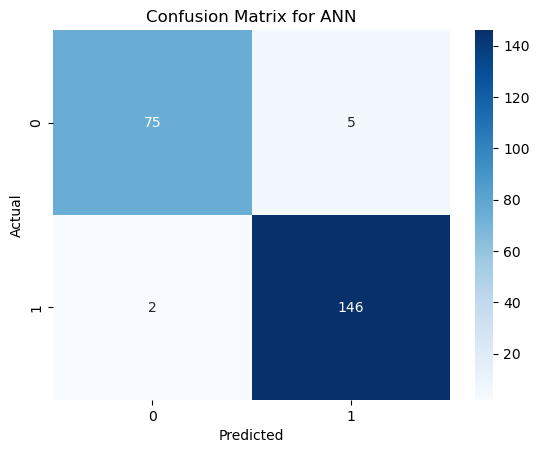

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96        80
           1       0.97      0.99      0.98       148

    accuracy                           0.97       228
   macro avg       0.97      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228



In [14]:
# Evaluation metrics

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for ANN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")